# Regresión

Vamos a trabajar con un dataset sobre precios de casas en boston:

- CRIM per capita crime rate by town
- ZN proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS proportion of non-retail business acres per town
- CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX nitric oxides concentration (parts per 10 million)
- RM average number of rooms per dwelling
- AGE proportion of owner-occupied units built prior to 1940
- DIS weighted distances to five Boston employment centres
- RAD index of accessibility to radial highways
- TAX full-value property-tax rate per \$10,000
- PTRATIO pupil-teacher ratio by town
- B: 1000(Bk - 0.63)^2 where Bk is the proportion of black people by town
- LSTAT % lower status of the population
- MEDV Median value of owner-occupied homes in $1000’s

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
boston_data = load_boston()
df = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
df['target'] = pd.Series(boston_data.target)
df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
df.shape

(506, 14)

¿ Hay nulos ?

In [5]:
# COMPLETAR
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

Imprimir descripción del dataset:

In [6]:
# COMPLETAR
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


¿ Hay variables correlacionadas entre sí ?

In [7]:
# COMPLETAR
# Alternativa 1
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


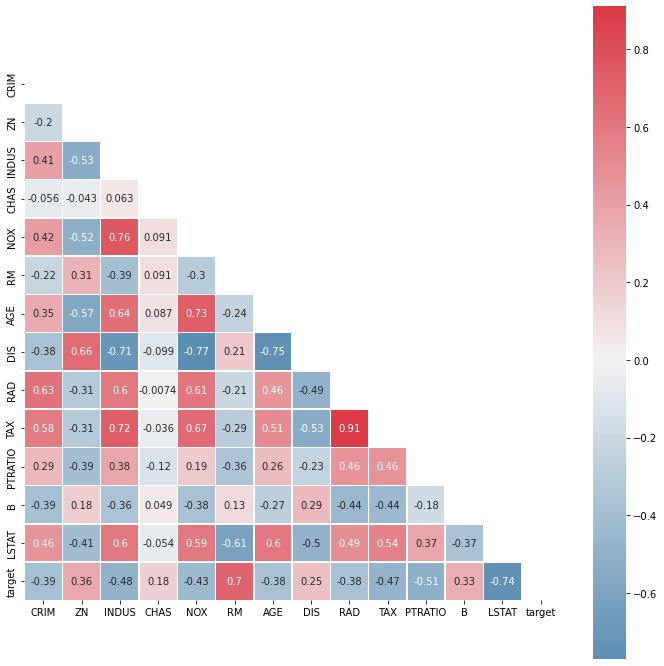

In [8]:
# Alternativa 2 
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df.corr(), mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, annot=True)

En OLS no es bueno poner variables que esten correlacionadas entre sí.

Por lo tanto, descartemos las variables que tienen una alta correlación (más de 0.9) y nos quedemos con 1 sola de ellas:

In [9]:
# COMPLETAR
df = df.drop(['RAD'], axis = 1)

¿ Cómo se distribuye nuestro target ?

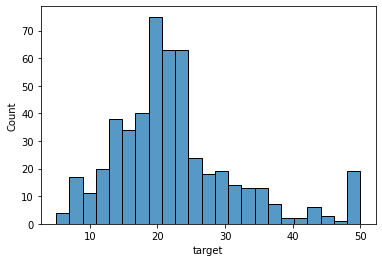

In [10]:
# COMPLETAR
sns.histplot(data=df,
             x='target')

# Train - Test split

Ahora, vamos a comenzar entrenando un modelo de regresión lineal de sklearn. Primero que nada, separemos en train - test.

Dejemos un 20% de los datos reservados para test y un random_state=42 para obtener todos los mismos resultados:

In [12]:
# COMPLETAR
from sklearn.model_selection import train_test_split
X = df.drop(["target"], axis=1)
y = df["target"].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear regression

Comenzaremos implementando una regresión lineal simple, utilizando Sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

En principio seleccionemos 1 sola variable como feature (puede ser por ejemplo, la que tenía la correlación más fuerte con el target)

In [13]:
# COMPLETAR
X_train_1 = X_train[["LSTAT"]].copy()
X_test_1 = X_test[["LSTAT"]].copy()

Importamos LinearRegression

In [14]:
# COMPLETAR
from sklearn.linear_model import LinearRegression

Entrenamos el modelo:

In [15]:
# COMPLETAR
reg = LinearRegression().fit(X_train_1,y_train)

Y validamos su score en train y en test (si se fijan en la documentación, el LinearRegression ya trae un método para calcular el score)

In [16]:
# COMPLETAR
reg.score(X_train_1, y_train)

0.5423180734793516

In [17]:
# COMPLETAR
reg.score(X_test_1, y_test)

0.5429180422970384

Al trabajar con una única feature, podemos graficar.

Graficar un scatterplot que contenga:
- Puntos para los datos de entrenamiento (X_test, y_test)
- Puntos para los datos de test en otro color (Usar hue)
- Una linea con la regresión (predicciones que genera nuestro modelo) en train
- Misma linea pero para test

Para esto, van a necesitar guardar las predicciones (su "y_test_pred" y "y_train_pred") en 2 listas:

In [18]:
# COMPLETAR
y_train_pred = reg.predict(X_train_1)
y_test_pred = reg.predict(X_test_1)

Ahora, agreguemos una feature más al modelo y hagamos lo mismo:

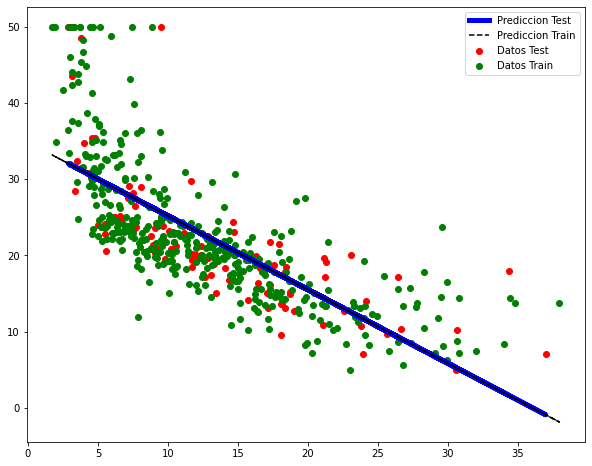

In [19]:
# COMPLETAR
plt.figure(figsize = (10,8))

plt.scatter(X_test_1, y_test,  color='red', label = 'Datos Test')
plt.plot(X_test_1, y_test_pred, color='blue', linewidth=5.0, label = 'Prediccion Test')

plt.scatter(X_train_1, y_train,  color='green', label = 'Datos Train')
plt.plot(X_train_1, y_train_pred, color='k', linestyle = '--', label = 'Prediccion Train')

plt.legend()
plt.show()

Ahora, agreguemos una feature más al modelo y hagamos lo mismo:

In [20]:
X_train_2 = X_train[["LSTAT", "RM"]].copy()
X_test_2 = X_test[["LSTAT", "RM"]].copy()

reg = LinearRegression().fit(X_train_2, y_train)

In [21]:
reg.score(X_train_2, y_train)

0.6501592679428922

In [22]:
reg.score(X_test_2, y_test)

0.5739577415025858

Vemos que ya empieza a haber una diferencia significativa en los scores entre train y test. Por último, agreguemos todas las features y midamos los R squared:

In [23]:
reg = LinearRegression().fit(X_train, y_train)

In [24]:
# COMPLETAR
# score train
reg.score(X_train, y_train)

0.7432668146680895

In [25]:
# score test
reg.score(X_test, y_test)

0.6390347738951394

Vemos que nuestro modelo se ajusta bastante mejor a los datos de train que de test. 

Si vemos en la documentación, hay 2 atributos que nos pueden interesar:

- coef_
- intercept_

¿ Qué significan cada uno ?

Imprimirlos

In [27]:
X_train.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [26]:
# COMPLETAR
reg.coef_

array([-8.13528576e-02,  2.20901901e-02, -1.49860929e-02,  3.12973863e+00,
       -1.55478394e+01,  4.72661372e+00, -9.59697735e-03, -1.42851306e+00,
        9.65690007e-04, -8.15257437e-01,  1.16253689e-02, -4.96644948e-01])

In [28]:
reg.intercept_

24.26087010315345

Medir el mean squared error (Sklearn tiene la implementacion)

In [31]:
# COMPLETAR
from sklearn.metrics import mean_squared_error
y_train_predict = reg.predict(X_train)
mean_squared_error(y_train, y_train_predict)

22.303285686660594

In [32]:
y_test_predict = reg.predict(X_test)
mean_squared_error(y_test, y_test_predict)

26.47094561959079

# Árboles de decision

Ahora, vamos a tratar de hacer lo mismo pero utilizando árboles de decision.

Vimos que sklearn tiene una implementación para esto: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

Importar el decision tree regressor:

In [33]:
from sklearn.tree import DecisionTreeRegressor

Vamos a hacer lo mismo que la clase pasada: Armar un listado de max_depths, entrenarlo y generar predicciones para cada elemento de la lista y decidir cuál es el mejor valor para max_depth.

En este caso, en lugar de medir el fscore, mediremos el MSE (mean squared error) para comparar con los resultados obtenidos en la regresión lineal

In [34]:
# COMPLETAR
max_depths = np.arange(1, 20)
train_scores = []
test_scores = []

for i in max_depths:
  tree = DecisionTreeRegressor(max_depth=i)

  tree.fit(X_train, y_train)
  train_preds = tree.predict(X_train)
  test_preds = tree.predict(X_test)

  train_scores.append(mean_squared_error(y_train, train_preds))
  test_scores.append(mean_squared_error(y_test, test_preds))

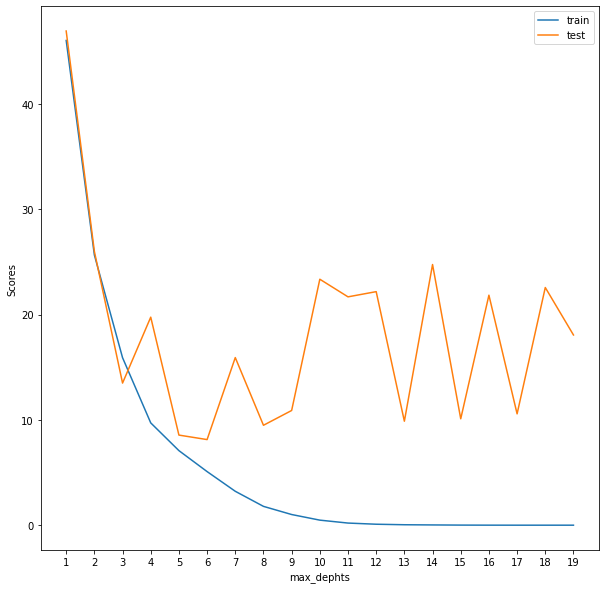

In [36]:
# COMPLETAR

plt.figure(figsize=(10,10))

plt.plot(max_depths, train_scores, label="train")
plt.plot(max_depths, test_scores,  label="test")
plt.xlabel('max_dephts')
plt.ylabel('Scores')
plt.xticks(max_depths)
plt.legend()

Vemos como el error va disminuyendo a medida que aumenta el max depth, pero a partir de la profundidad 5, se separan ambas lineas (comienza a overfittear) por lo que avanzaremos con un max_depth=5.

Entrenar el árbol con max_depth=5 y medir el mean_squared_error:

In [37]:
tree = DecisionTreeRegressor(max_depth=5)

tree.fit(X_train, y_train)
train_preds = tree.predict(X_train)
test_preds = tree.predict(X_test)

In [38]:
# mean_squared_error para train
mean_squared_error(y_train, train_preds)

7.078696760120875

In [39]:
# mean_squared_error para test
mean_squared_error(y_test, test_preds)

20.356259525823308

In [57]:
# parametros utilizados por el modelo Dtree regressor
tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

Vemos como podemos obtener mucho mejores resultados con un simple árbol de decisión.

# KNN

Ahora, probemos KNN.

Vimos que KNN se puede utilizar para regresión y lo que hace es tomar una media ponderada de los vecinos más cercanos.

Importemos knn regressor de sklearn:

In [40]:
# COMPLETAR
from sklearn.neighbors import KNeighborsRegressor

Recuerden que en KNN, es importante escalar los datos. Por lo tanto, vamos a escalar X_train y X_test con un standard scaler.

Escalar los datos:

In [43]:
# COMPLETAR
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

Ahora, vamos a entrenar el modelo con distintos valores de K, al igual que hicimos con la profundidad de los arboles.

Entrenar knn con k desde 1 hasta 20 y decidir cuál es el mejor valor:

In [44]:
# COMPLETAR

K = np.arange(1, 20)
train_scores = []
test_scores = []

for i in K:
  knn = KNeighborsRegressor(n_neighbors=i)

  knn.fit(X_train_scaled, y_train)
  train_preds = knn.predict(X_train_scaled)
  test_preds = knn.predict(X_test_scaled)

  train_scores.append(mean_squared_error(y_train, train_preds))
  test_scores.append(mean_squared_error(y_test, test_preds))


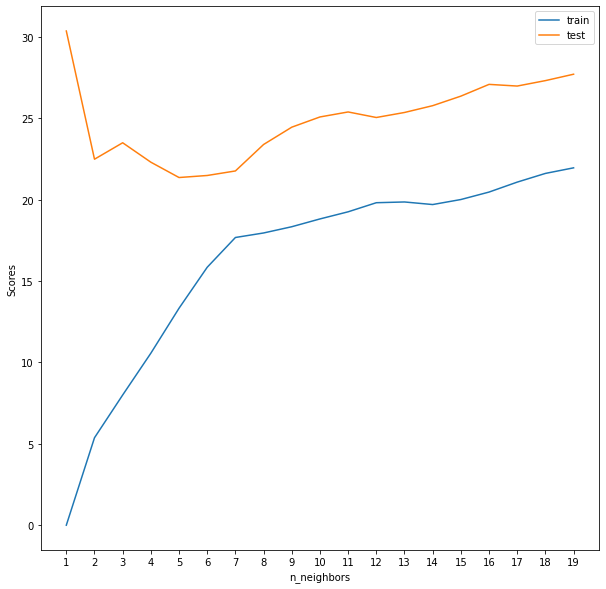

In [45]:
# Plot de los mean_sqared_error para knn

plt.figure(figsize=(10,10))

plt.plot(K, train_scores, label="train")
plt.plot(K, test_scores,  label="test")
plt.xlabel('n_neighbors')
plt.ylabel('Scores')
plt.xticks(max_depths)
plt.legend()

Observando el gráfico, decidir el mejor valor de K y volver a entrenar knn.

Luego, medir el MSE y comparar con los modelos anteriores:

In [52]:
# k optimo = 6
knn = KNeighborsRegressor(n_neighbors=6)
knn.fit(X_train_scaled,y_train)

train_preds = knn.predict(X_train_scaled)
test_preds = knn.predict(X_test_scaled)

In [53]:
# mean_squared_error train
mean_squared_error(y_train, train_preds)

15.848281078107808

In [54]:
# mean_squared_error test
mean_squared_error(y_test, test_preds)

21.486181917211326

¿ Conclusiones ?

* El DTree regressor es el que mejor metrica de mean_squared_error nos devolvió
* Los parametros a utilizar en el tree regressor son 
{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}